## Requisitos 1, 2, 3 y 5: 
## Analisis de Series de Tiempo, EDA, Calidad de Datos, Segmentación Inteligente de los Datos (Requisitos 1-3,5)

### 1. **Análisis de Series Temporales**
**Resumen:** El análisis de series temporales permite identificar patrones, tendencias y estacionalidades en los precios y volúmenes de ventas de aguacates a lo largo del tiempo.

1. **Descomposición de Series Temporales de Precios:** 
   - **Uso de Datos:** Usa la columna `AveragePrice` y `Date`.
   - **Esperado:** Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido. 
     - Convierte `Date` a tipo datetime usando `pd.to_datetime()`.
     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.

2. **Análisis de Estacionalidad por Región:** 
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Date` y `Total Volume`.
   - **Esperado:** Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
     - Agrupa los datos por `region` y `Date` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada región.
     - Representa gráficamente las tendencias utilizando `plt.plot()` de `matplotlib`.

3. **Comparación de Precios Promedio Mensuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Date`.
   - **Esperado:** Calcula y compara los precios promedio mensuales.
     - Agrupa los datos por mes usando `pd.Grouper` con `freq='M'`.
     - Calcula el promedio de `AveragePrice` para cada mes con `mean()`.
     - Visualiza los resultados con un gráfico de líneas usando `plt.plot()`.

4. **Tendencia de Ventas a lo Largo del Tiempo:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.

5. **Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.

In [3]:

import pandas as pd
import os

#cargar datos
current_path = os.getcwd()
aguacate_index = current_path.find("uoc-proyecto3")
if aguacate_index != -1:
        project_root = current_path[:aguacate_index + len("uoc-proyecto3")]
else:
    raise FileNotFoundError("The directory 'uoc-proyecto3' was not found in the path.")
data_path = os.path.join(project_root, 'data', 'Avocado_HassAvocadoBoard_20152023v1.0.1.csv')
dataset_avocado_original_df = pd.read_csv(data_path)

region_classification = {
    'Albany': 'City',
    'Atlanta': 'City',
    'BaltimoreWashington': 'Region',
    'BirminghamMontgomery': 'Region',
    'Boise': 'City',
    'Boston': 'City',
    'BuffaloRochester': 'Region',
    'California': 'GreaterRegion',
    'Charlotte': 'City',
    'Chicago': 'City',
    'CincinnatiDayton': 'Region',
    'Columbus': 'City',
    'DallasFtWorth': 'Region',
    'Denver': 'City',
    'Detroit': 'City',
    'GrandRapids': 'City',
    'GreatLakes': 'GreaterRegion',
    'HarrisburgScranton': 'Region',
    'HartfordSpringfield': 'Region',
    'Houston': 'City',
    'Indianapolis': 'City',
    'Jacksonville': 'City',
    'LasVegas': 'City',
    'LosAngeles': 'City',
    'Louisville': 'City',
    'Miami': 'City',
    'MiamiFtLauderdale': 'Region',
    'Midsouth': 'GreaterRegion',
    'Nashville': 'City',
    'NewOrleans': 'City',
    'NewYork': 'City',
    'Northeast': 'GreaterRegion',
    'NorthernNewEngland': 'Region',
    'Orlando': 'City',
    'PeoriaSpringfield': 'Region',
    'Philadelphia': 'City',
    'PhoenixTucson': 'Region',
    'Pittsburgh': 'City',
    'Plains': 'GreaterRegion',
    'Portland': 'City',
    'Providence': 'City',
    'RaleighGreensboro': 'Region',
    'RichmondNorfolk': 'Region',
    'Roanoke': 'City',
    'Sacramento': 'City',
    'SanDiego': 'City',
    'SanFrancisco': 'City',
    'Seattle': 'City',
    'SouthCarolina': 'Region',
    'SouthCentral': 'GreaterRegion',
    'Southeast': 'GreaterRegion',
    'Spokane': 'City',
    'StLouis': 'City',
    'Syracuse': 'City',
    'Tampa': 'City',
    'Toledo': 'City',
    'TotalUS': 'TotalUS',
    'West': 'GreaterRegion',
    'WestTexNewMexico': 'Region',
    'Wichita': 'City'
}

def map_regions(original_data: pd.DataFrame, region_map: dict, guardar: bool = False) -> pd.DataFrame:
    """
    Asigna la clasificación de regiones y ciudades al dataframe original de aguacate
    en una nueva columna region_type

    Parametros:
    - original_data: pd.DataFrame-  Datos originales avocado.csv
    - region_map: Dict[str, str] - El mapping de agrupaciones
    - guardar: Boolean - True or False para guardar nuevo csv o no

    Regresa:
    - pd.DataFrame: Dataframe actualizado de los datos originales
    """

    path_salida = "data/avocado_with_region_types.csv"
    nuevo_aguacate_df = original_data.copy()
    nuevo_aguacate_df['region_type'] = nuevo_aguacate_df['region'].map(region_map)
    if guardar:
        print(f"Guardando archivo .csv en /data/  ...")
        nuevo_aguacate_df.to_csv(path_salida, index=False)
    else:
        pass

    return nuevo_aguacate_df

def obtener_nuevo_avocado()-> pd.DataFrame:
    """
    Función que devuelve dataframe con columna region_type

    Regresa:
    - pd.DataFrame: DataFrame con columna nueva que agrupa regiones para análisis
    """

    nuevo_avocado_df = map_regions(dataset_avocado_original_df, region_classification, guardar=True)
    return nuevo_avocado_df



In [4]:
# Cargar librerias
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd


df_orig = obtener_nuevo_avocado()

#df_orig = pd.read_csv("avocado_with_region_types.csv")

# guardamos el original y trabajamos con una copia
df = df_orig.copy()



Guardando archivo .csv en /data/  ...


In [8]:
df_orig.info()

# Assuming your DataFrame is named df and the 'Date' column is already in datetime format
df['Date'] = pd.to_datetime(df['Date'])  # Ensure the 'Date' column is in datetime format

# Filter rows where 'Date' is less than or equal to 2018-03-25
filtered_rows = df[df['Date'] <= '2018-03-25']

# Get the number of rows
number_of_rows = len(filtered_rows)

print("Number of rows where 'Date' is <= 2018-03-25:", number_of_rows)

print(filtered_rows['TotalVolume'].sum)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
 12  region_type   53415 non-null  object 
dtypes: float64(9), object(4)
memory usage: 5.3+ MB
Number of rows where 'Date' is <= 2018-03-25: 18369
<bound method Series.sum of 0         40873.28
1          1373.95
2        435021.49
3          3846.69
4        788025.06
           ...    


Vemos que tenemos 53415 ocurencias de todas las columnas excepto los SamllBags,LargeBags y XLargeBags, que PUEDE SER DEBIDO QUE en algunas regiones no venden en bolsas de este tamaño.

1. **Descomposición de Series Temporales de Precios:** 
   - **Uso de Datos:** Usa la columna `AveragePrice` y `Date`.
   - **Esperado:** Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido. 
     - Convierte `Date` a tipo datetime usando `pd.to_datetime()`.
     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.


In [4]:
# Convierte Date a tipo datetime usando pd.to_datetime().
# Convierte la columna de fecha a un formato adecuado y agrupa los datos mensuales para visualizar las tendencias de ventas en un gráfico.

df['Date'] = pd.to_datetime(df['Date'])

# añadimos columna 'year'
df['year'] = df['Date'].dt.year  # Extract the year from the datetime column

# Agrupa los datos por Date y calcula el promedio de AveragePrice utilizando groupby() si es necesario.

df[["Date", "region", "region_type", "AveragePrice"]].groupby(by=["Date","region_type", "region"]).mean()

# Filtrar los datos para 'GreaterRegion' en la columna 'region_type'
df_reduced = df.loc[df['region_type'] == 'GreaterRegion'].copy()
df_cities = df.loc[df['region_type'] == 'City'].copy()
df_regions = df.loc[df['region_type'] == 'Region'].copy()



In [5]:
# Visualiza los componentes descompuestos usando matplotlib para cada uno de ellos
import seaborn as sns
import matplotlib.pyplot as plt


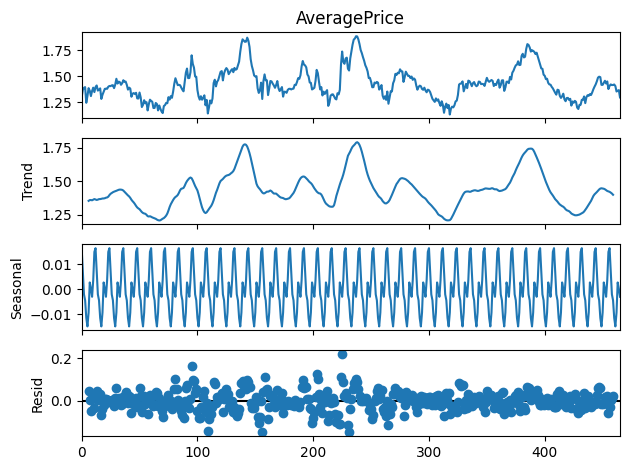

In [6]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

df_grouped = df.groupby('Date')['AveragePrice'].mean().reset_index()

period = 12

result = seasonal_decompose(df_grouped['AveragePrice'], model='additive', period=period)
result.plot()

plt.show()

2. **Análisis de Estacionalidad por Región:** 
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Date` y `Total Volume`.
   - **Esperado:** Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
     - Agrupa los datos por `region` y `Date` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada región.
     - Representa gráficamente las tendencias utilizando `plt.plot()` de `matplotlib`.

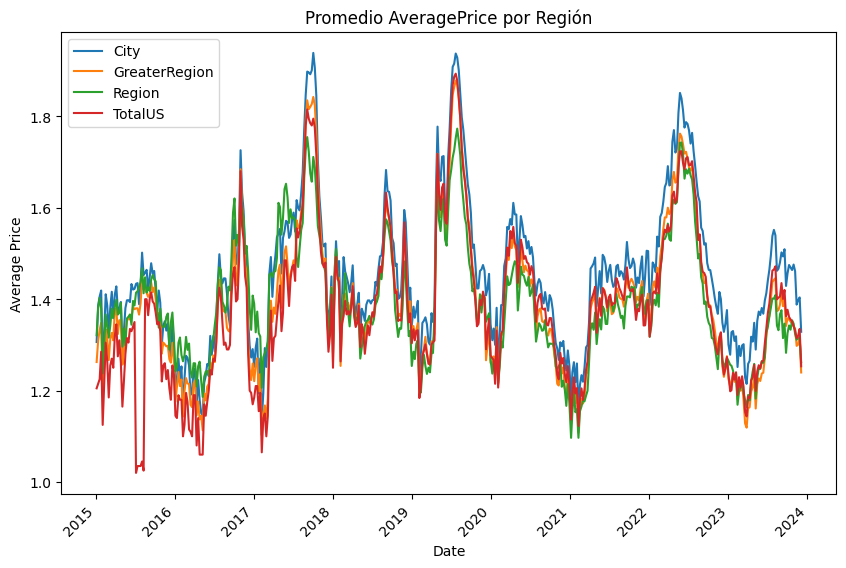

In [7]:
# Group by 'Date' and 'region_type' and calculate the mean of 'AveragePrice'
df_grouped = df.groupby(['Date', 'region_type'])['AveragePrice'].mean().reset_index()

# Create separate plots for each region_type
plt.figure(figsize=(10,6))

for region_type in df_grouped['region_type'].unique():
    region_type_data = df_grouped[df_grouped['region_type'] == region_type]
    plt.plot(region_type_data['Date'], region_type_data['AveragePrice'], label=region_type)
 
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Promedio AveragePrice por Región')
plt.xticks(rotation=45, ha='right')  # mejorar legibilidad
plt.legend()
plt.show()

3. **Comparación de Precios Promedio Mensuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Date`.
   - **Esperado:** Calcula y compara los precios promedio mensuales.
     - Agrupa los datos por mes usando `pd.Grouper` con `freq='M'`.
     - Calcula el promedio de `AveragePrice` para cada mes con `mean()`.
     - Visualiza los resultados con un gráfico de líneas usando `plt.plot()`.

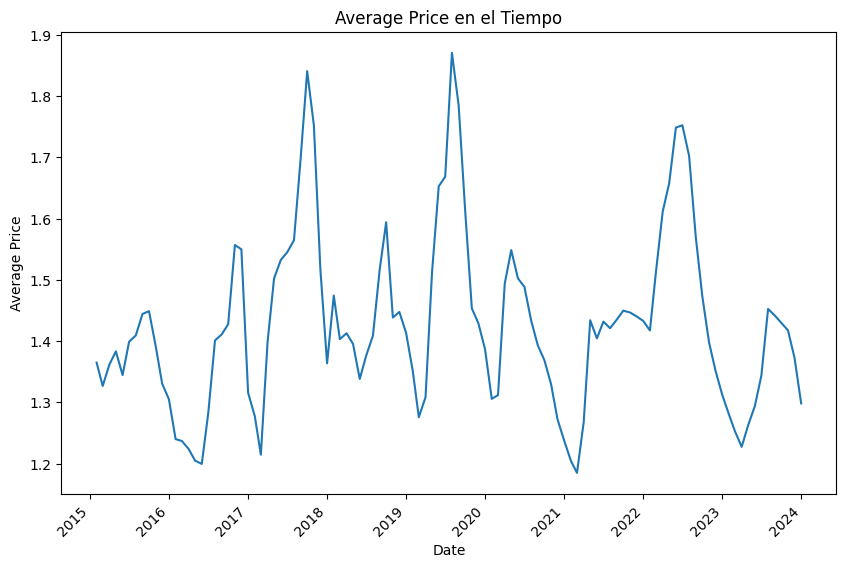

In [8]:
# Using AveragePrice and Date calculate and compare average monthly prices
df_grouped = df.groupby(pd.Grouper(key='Date', freq='ME'))['AveragePrice'].mean().reset_index()

# Plot the average monthly
plt.figure(figsize=(10,6))
plt.plot(df_grouped['Date'], df_grouped['AveragePrice'])
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price en el Tiempo')
plt.xticks(rotation=45, ha='right')  # mejorar legibilidad
plt.show()

4. **Tendencia de Ventas a lo Largo del Tiempo:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.

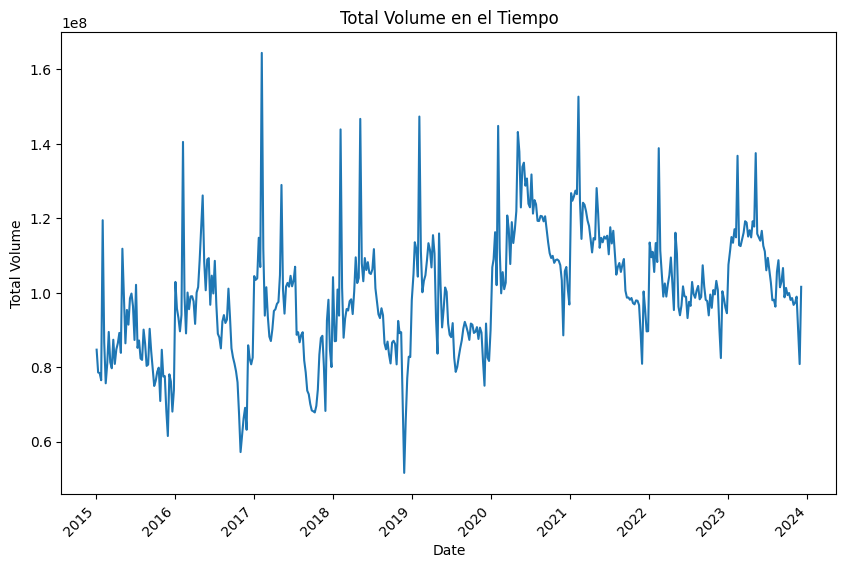

In [9]:
df_grouped = df.groupby('Date')['TotalVolume'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.plot(df_grouped['Date'], df_grouped['TotalVolume'])
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.title('Total Volume en el Tiempo')
plt.xticks(rotation=45, ha='right')  # mejorar legibilidad
plt.show()


5. **Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.

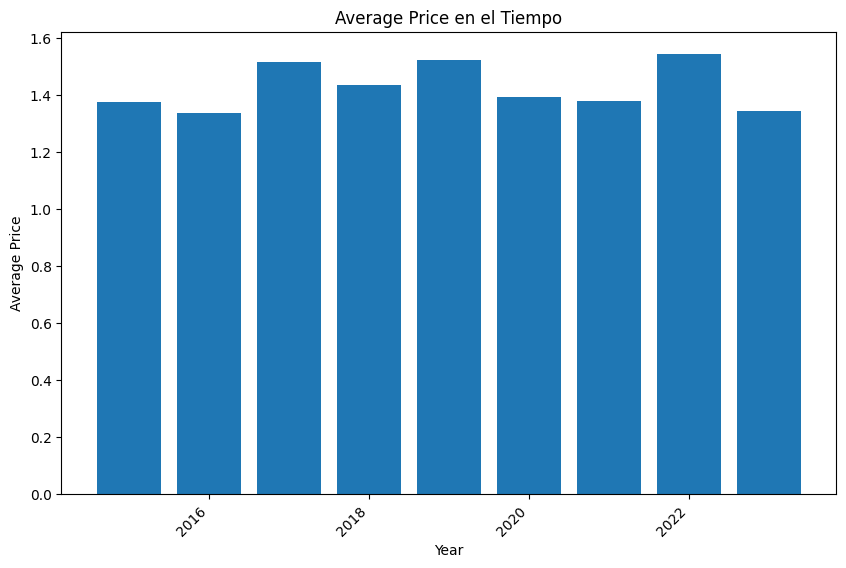

In [10]:

df_grouped = df.groupby('year')['AveragePrice'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(df_grouped['year'], df_grouped['AveragePrice'])
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price en el Tiempo')
plt.xticks(rotation=45, ha='right')  # mejorar legibilidad
plt.show()


### 2. **Análisis Exploratorio de Datos (EDA) / Analisis de Calidad de Datos**
**Resumen:** Identificar patrones, anomalies y relaciones entre variable mediante visualizaciones y estadisticas descriptivas. Evaluar la calidad de los datos, identificando problemas como valores faltantes, inconsistencias, errores o duplicados.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          53415 non-null  datetime64[ns]
 1   AveragePrice  53415 non-null  float64       
 2   TotalVolume   53415 non-null  float64       
 3   plu4046       53415 non-null  float64       
 4   plu4225       53415 non-null  float64       
 5   plu4770       53415 non-null  float64       
 6   TotalBags     53415 non-null  float64       
 7   SmallBags     41025 non-null  float64       
 8   LargeBags     41025 non-null  float64       
 9   XLargeBags    41025 non-null  float64       
 10  type          53415 non-null  object        
 11  region        53415 non-null  object        
 12  region_type   53415 non-null  object        
 13  year          53415 non-null  int32         
dtypes: datetime64[ns](1), float64(9), int32(1), object(3)
memory usage: 5.5+ MB


**Miramos los nulos y reemplazamos los valores nulos de SmallBags, LargeBags y XLargeBags o ceros.**

In [12]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          53415 non-null  datetime64[ns]
 1   AveragePrice  53415 non-null  float64       
 2   TotalVolume   53415 non-null  float64       
 3   plu4046       53415 non-null  float64       
 4   plu4225       53415 non-null  float64       
 5   plu4770       53415 non-null  float64       
 6   TotalBags     53415 non-null  float64       
 7   SmallBags     41025 non-null  float64       
 8   LargeBags     41025 non-null  float64       
 9   XLargeBags    41025 non-null  float64       
 10  type          53415 non-null  object        
 11  region        53415 non-null  object        
 12  region_type   53415 non-null  object        
 13  year          53415 non-null  int32         
dtypes: datetime64[ns](1), float64(9), int32(1), object(3)
memory usage: 5.5+ MB


In [13]:
# try to cleanup null values
df.fillna(0)
print(f'\n\nDatos nulos en columnas son : \n\n{df.isna().sum()}')
print(f'\n\nExisten filas duplicadas?\n\n{df.duplicated().any()}')
round(df.describe().T,3)




Datos nulos en columnas son : 

Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
region_type         0
year                0
dtype: int64


Existen filas duplicadas?

False


,count,mean,min,25%,50%,75%,max,std
Date,53415,2019-07-21 08:27:50.901432320,2015-01-04 00:00:00,2017-05-14 00:00:00,2019-08-04 00:00:00,2021-10-03 00:00:00,2023-12-03 00:00:00,NaN
AveragePrice,53415.0,1.42891,0.44,1.119091,1.4,1.69,3.44083,0.393116
TotalVolume,53415.0,869447.441374,84.56,16264.655,120352.46,454238.015,61034457.1,3545273.998345
plu4046,53415.0,298270.749448,0.0,694.725,14580.58,128792.38,25447201.87,1307669.329406
plu4225,53415.0,222217.037654,0.0,2120.8,17516.63,93515.6,20470572.61,955462.406892
plu4770,53415.0,20531.954686,0.0,0.0,90.05,3599.735,2860025.19,104097.691562
TotalBags,53415.0,217508.289491,0.0,7846.52,36953.1,111014.61,16298296.29,867694.737352
SmallBags,41025.0,103922.170677,0.0,0.0,694.58,37952.98,12567155.58,569260.825954
LargeBags,41025.0,23313.164066,0.0,0.0,0.0,2814.92,4324231.19,149662.244458
XLargeBags,41025.0,2731.811796,0.0,0.0,0.0,0.0,679586.8,22589.096454


/tmp/ipykernel_12893/1982962541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df['type'], order = df['type'].value_counts(ascending=True).index, palette='rocket')


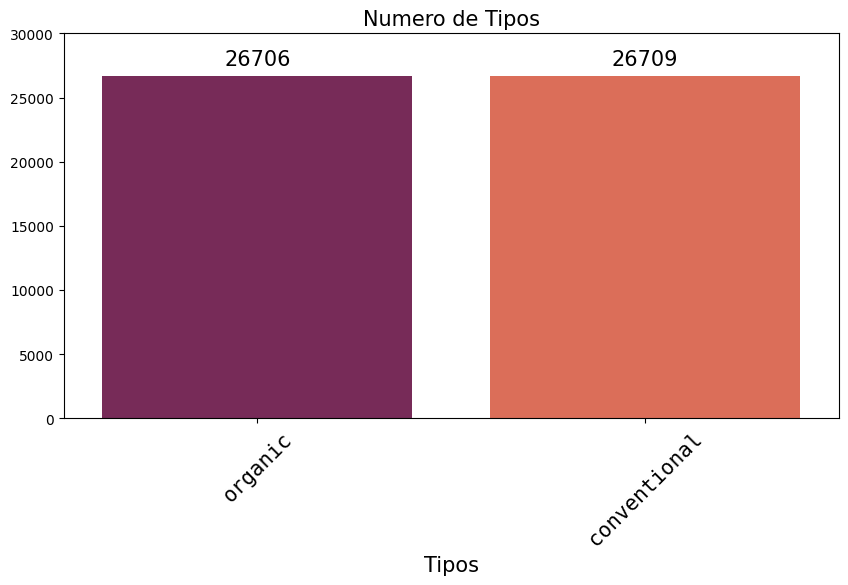

In [14]:
plt.figure(figsize=(10,5))

ax = sns.countplot(x = df['type'], order = df['type'].value_counts(ascending=True).index, palette='rocket')

for x in ax.containers:
    ax.bar_label(x, fmt="%d",padding = 5, label_type="edge",fontsize=15)

ax.set_ylim(0,30000)
ax.set_title('Numero de Tipos',fontsize=15)
ax.set_xlabel('Tipos',fontsize=15)
ax.set_ylabel('')

plt.xticks(rotation=45, fontsize=15, fontname='monospace')

plt.show()

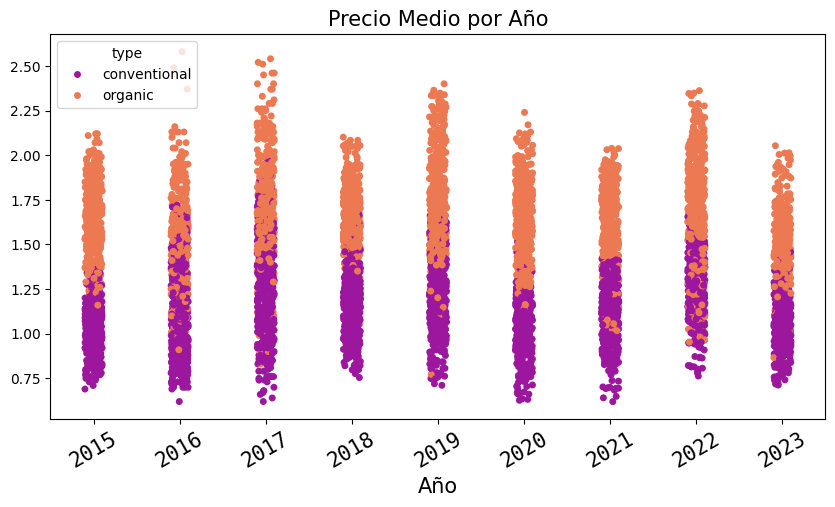

In [15]:


plt.figure(figsize=(10,5))
ax = sns.stripplot(x=df_reduced['year'],y=df_reduced['AveragePrice'],hue=df_reduced['type'],palette='plasma')
ax.set_title('Precio Medio por Año',fontsize=15)
ax.set_xlabel('Año',fontsize=15)
ax.set_ylabel('')
plt.xticks(rotation=30,fontsize=15,fontname='monospace')
plt.show()

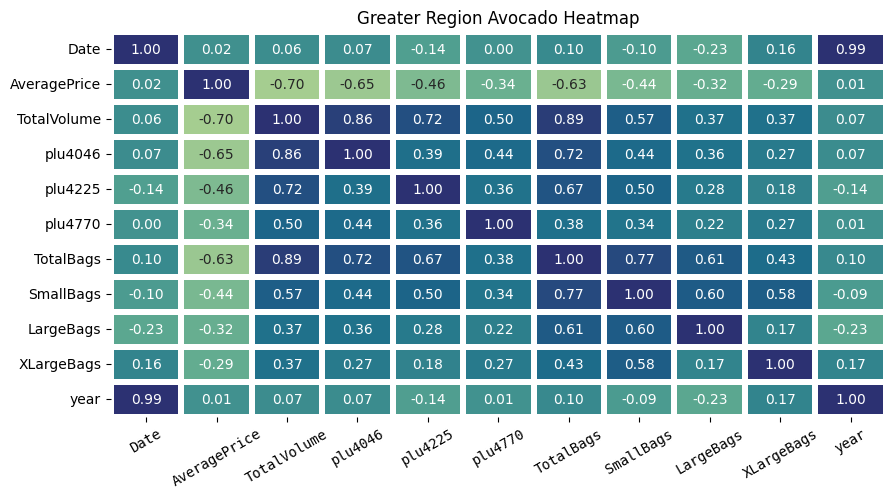

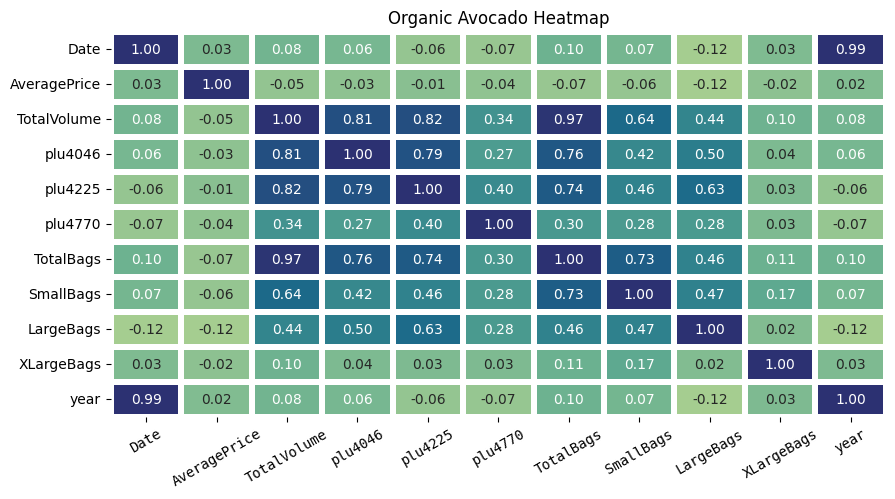

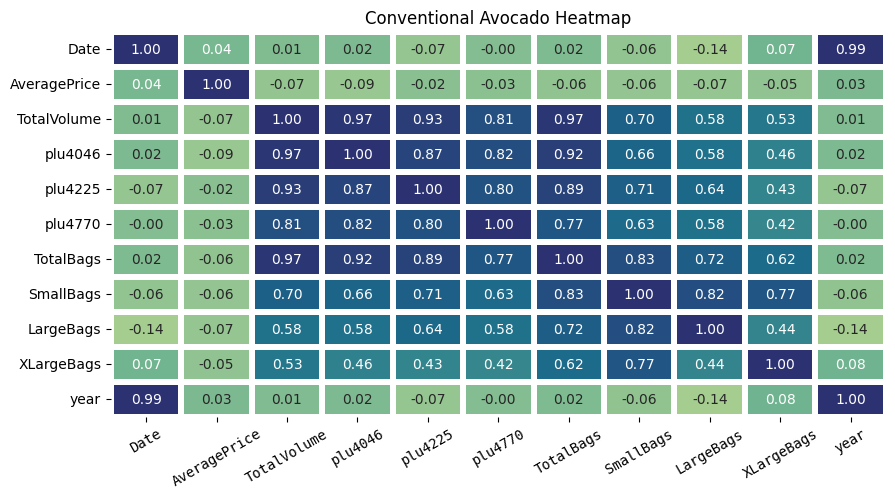

In [16]:
df_conventional=df.loc[df['type'] == 'conventional'].copy()
df_organic=df.loc[df['type'] == 'organic'].copy()

obj_data = df_reduced.select_dtypes(exclude='object')
corr = obj_data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=3, cbar=False, cmap="crest")
plt.xticks(rotation=30,fontsize=10,fontname='monospace')
plt.title('Greater Region Avocado Heatmap')
plt.show()


obj_data = df_organic.select_dtypes(exclude='object')
corr = obj_data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=3, cbar=False, cmap="crest")
plt.xticks(rotation=30,fontsize=10,fontname='monospace')
plt.title('Organic Avocado Heatmap')
plt.show()


obj_data = df_conventional.select_dtypes(exclude='object')
corr = obj_data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=3, cbar=False, cmap="crest")
plt.xticks(rotation=30,fontsize=10,fontname='monospace')
plt.title('Conventional Avocado Heatmap')
plt.show()